In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load Data

df = pd.read_csv("modified_data.csv", index_col=0)
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignsAcc
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,1,0,SP,0,2014,1190,15,1
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,1,1,0,CA,0,2014,577,18,2
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,US,1,2014,251,11,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,AUS,2,2014,11,4,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,1,0,SP,1,2014,91,8,2


# DATA VISUALIZATION

## 1) Which marketing campaign is most successful?

In [6]:
campaign_df = df[[col for col in df.columns if "Cmp" in col] + ["Response"]].mean().sort_values() * 100

In [46]:
cols = list(campaign_df.index)

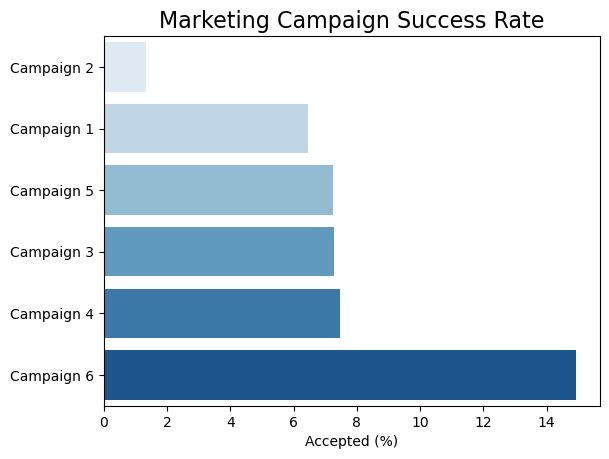

In [56]:
sns.barplot(
    data=campaign_df,
    orient="h",
    palette="Blues"
)
plt.title("Marketing Campaign Success Rate", size=16)
plt.xlabel("Accepted (%)")
plt.yticks(ticks=cols, labels=[f"Campaign {col[-1]}" if "Cmp" in col else "Campaign 6" for col in cols])
plt.show()

Conclusion: the most successful campaign is the most recent (Response column)

## 2) What does the average customer look like for this company?                                      

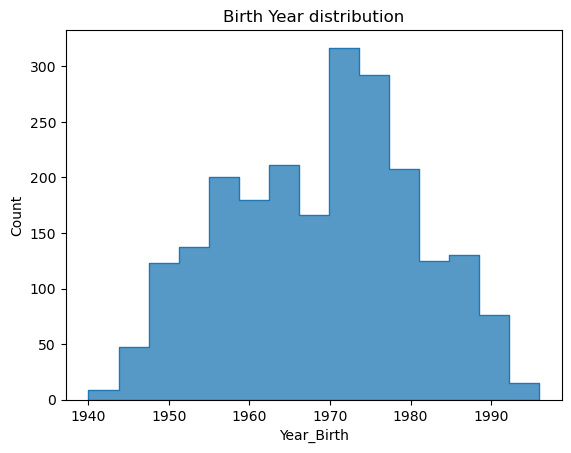

In [10]:
sns.histplot(
    data=df.Year_Birth,
    element="step",
    bins=15
)
plt.title("Birth Year distribution")
plt.show()

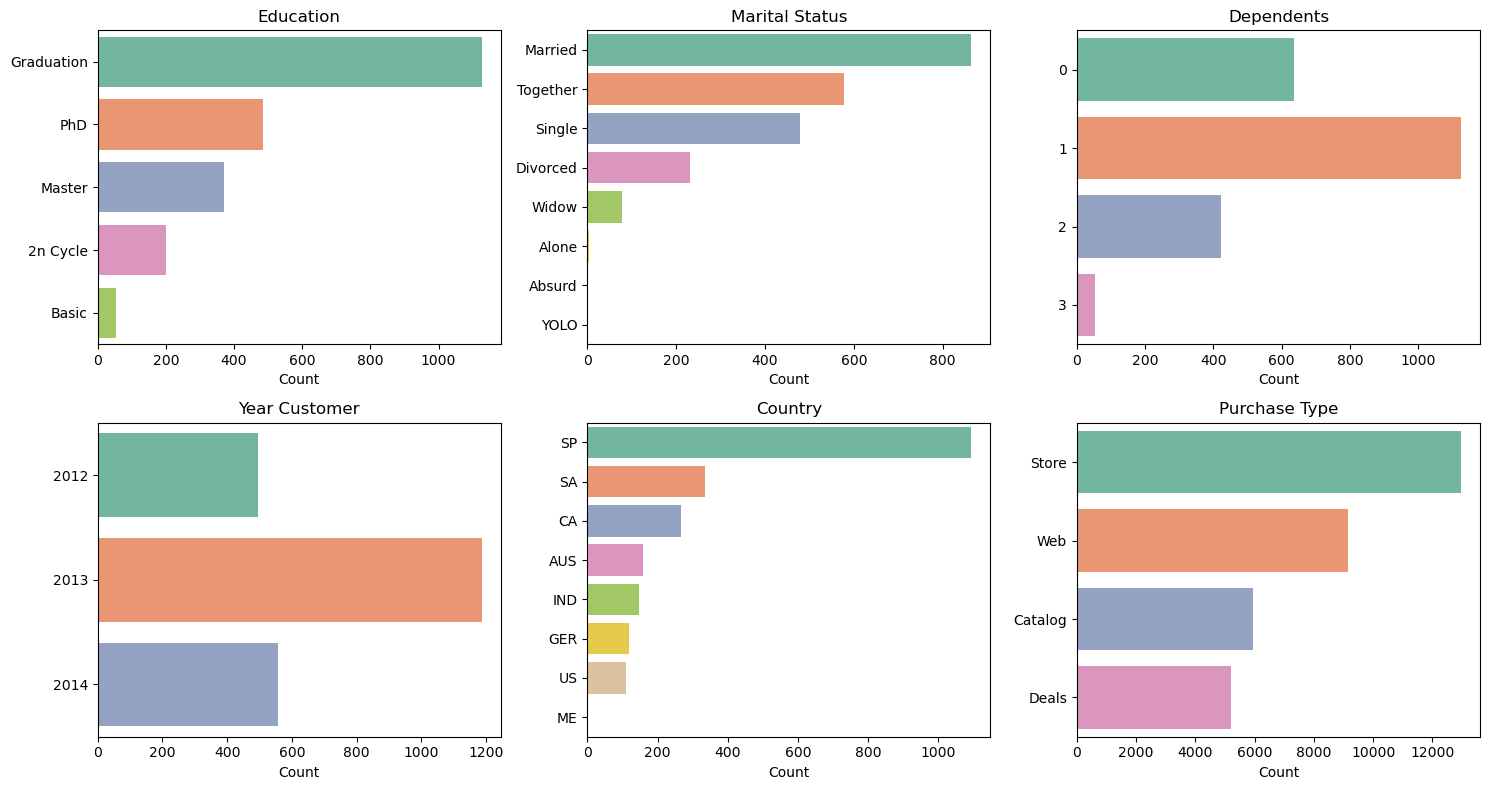

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

i = j = 0
for col in ("Education", "Marital_Status", "Dependents", "Year_Customer", "Country"):
    data = df.groupby(col)["ID"].count().sort_values(ascending=False)
    sns.barplot(
        data=data,
        orient="h",
        palette="Set2",
        ax=ax[i, j]
    ),
    ax[i, j].set_title(" ".join(col.split("_")))
    ax[i, j].set_xlabel("Count")
    ax[i, j].set_ylabel("")
    
    j += 1
    if j > 2: i, j = 1, 0

sns.barplot(
        data=df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values(ascending=False),
        palette="Set2",
        orient="h",
        ax=ax[1, 2]
)
ax[1, 2].set_yticks(
    ticks=['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'],
    labels=["Deals", "Web", "Catalog", "Store"]
)
ax[1, 2].set_title("Purchase Type")
ax[1, 2].set_xlabel("Count")

plt.tight_layout()

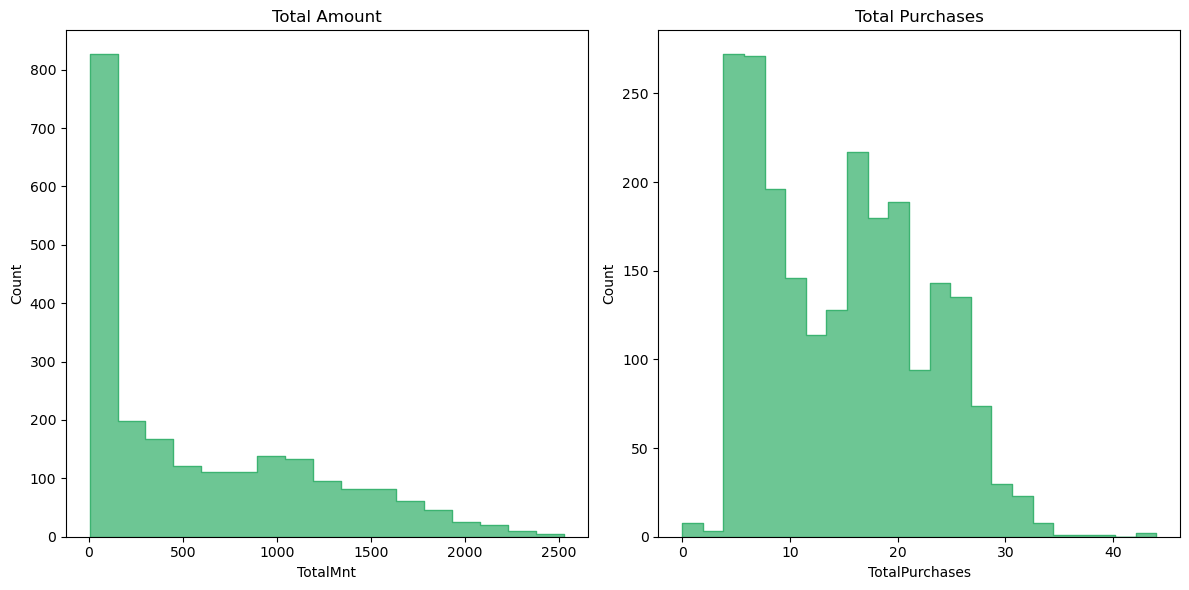

In [12]:
figure, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(
    data=df.TotalMnt,
    color="mediumseagreen",
    element="step",
    ax=axes[0]
)
sns.histplot(
    data=df.TotalPurchases,
    element="step",
    color="mediumseagreen",
    ax=axes[1]
)

axes[0].set_title("Total Amount")
axes[1].set_title("Total Purchases")

plt.tight_layout()

### Conclusion:
- Born in 1969
- Married
- Became a customer in 2013
- Has an income of 52,000 USD
- Has 1 dependent
- Has an average of total amount of 605 USD
- Has an average of total purchases of 15
- Made a purchase from the company in the last 49 days

## 3) Which products are performing best?                                 

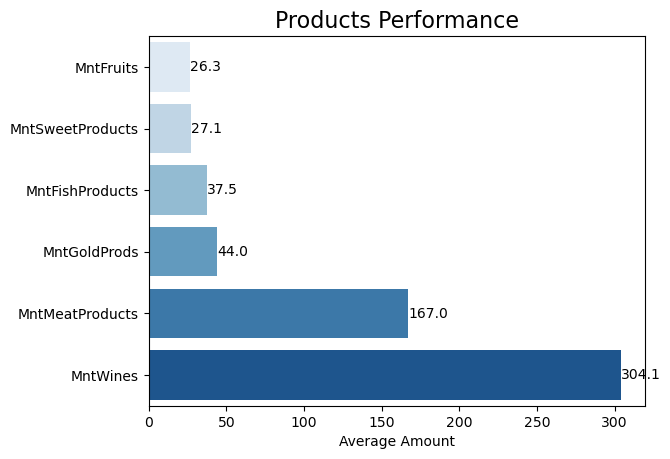

In [58]:
mnt_cols = [col for col in df.columns if "Mnt" in col and col != "TotalMnt"]

ax = prods = sns.barplot(
    df[mnt_cols].mean().sort_values(),
    orient="h",
    palette="Blues"
)

for i in ax.containers:
    ax.bar_label(i, fmt=lambda x: round(x, 1))

plt.title("Products Performance", size=16)
plt.xlabel("Average Amount")
plt.savefig("product_performance.png")
plt.show()

### Products performing best:
- Wines (over 300 USD on average)
- Meat products (over 150 USD)

## 4) Which channels are underperforming?                                              

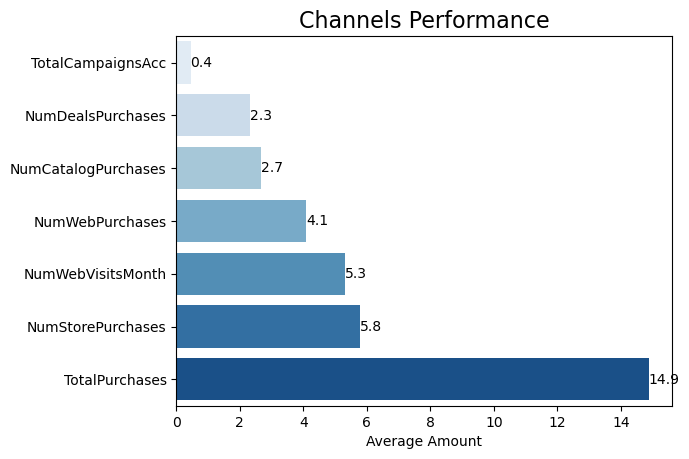

In [18]:
cols = [
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth','TotalCampaignsAcc',
    "TotalPurchases"
]

ax = sns.barplot(
    df[cols].mean().sort_values(),
    orient="h",
    palette="Blues"
)

for i in ax.containers:
    ax.bar_label(i, fmt=lambda x: round(x, 1))

plt.title("Channels Performance", size=16)
plt.xlabel("Average Amount")

plt.show()

### Insights:

The average customer accepted less than 1 advertising campaign,
made 2 deal and catalog purchases, 4 web purchases and 5 store purchases

Underperforming channels:
- advertising campaigns
- deal and catalog purchases

# CONCLUSION


- The most successful campaign was the recent one (Response column) and it was particularly successful in Spain

  Suggested action: use the same (recent) campaign model for future campaigns 

- Advertising campaign acceptance is positively correlated with income and negatively correlated with having dependents

  Suggested action: create two streams of targeted advertising campaigns: one aimed at high income individuals without dependents and   another aimed at lower-income individuals with dependent
  
- The most successful products are wines and meats
  
  Suggested action: focus advertising campaigns on boosting sales of the less popular items
- The underperforming channels are deals and catalog purchases
- The best performing channels are web and store purchases

  Suggested action: focus advertising campaigns on the more successful channels in order to reach more customers

                                    